# Regression (förutsäga bostadsvärde)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

## 1) Dataförståelse & EDA

### Data Loading

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Dataset Overview

In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


### Missing Values

In [ ]:
print("Missing values per column:")
df.isna().sum()

In [6]:
df["total_bedrooms"]= df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [7]:
print("Missing values per column:")
df.isna().sum()

Missing values per column:


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Datasetet innehöll endast 207 saknade värden i `total_bedrooms`, vilket motsvarar cirka 1% av observationerna. Andelen av saknade värden bedömmer jag som låg, variabeln är numerisk därför väljer jag att ersatta de med medianen för kolumnen.
Medianen är robust mot extremvärden och påverkar därför fördelningen mindre än medelvärdet.

### Exploratory Visualizations

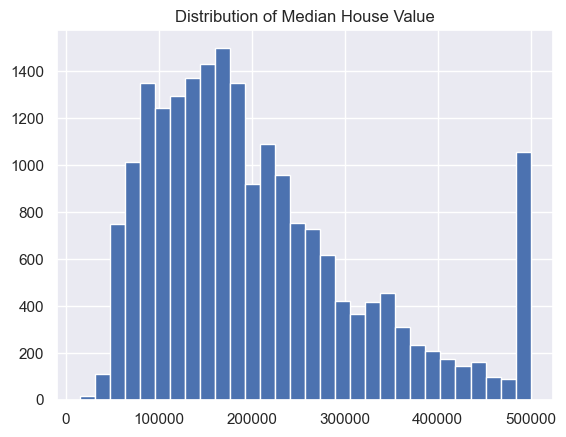

In [8]:
df["median_house_value"].hist(bins=30)
plt.title("Distribution of Median House Value")
plt.show()

Väldigt bra observation för EDA. I fördelningen av `median_house_value` har majoriteten av bostäderna lägre värden medan ett mindre antal observationer har höga värden. Det syns även en tydlig kring 500 000 USD, som tyder på att variabeln är övre begränsad. 

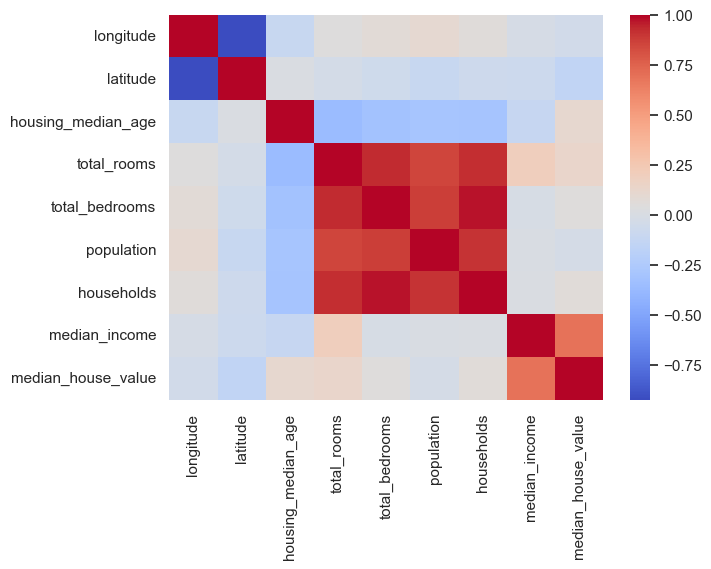

In [9]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.show()

Medianinkomst verkar vara den viktigaste prediktorn för bostadsvärde baserat på korrelationen. Eftersom flera variabler är starkt korrelerade med varandra kan detta påverka vissa regressionsmodeller, exempelvis linjär regression.

## 2) Split + preprocessing

- Dela datan i train och test.
- Preprocessing ska göras på ett sätt som undviker att testdata påverkar träningen.

In [10]:
target_column_name = "median_house_value"

X_full = df.drop(columns=[target_column_name, "ocean_proximity"])
y_full = df[target_column_name]

X_train, X_test, y_train, y_test = train_test_split(
    X_full,
    y_full,
    test_size=0.2,          # jag tar 20% av datan som test
    random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

Train shape: (16512, 8) (16512,)
Test shape: (4128, 8) (4128,)


## 3) Modellering

- Skapa en baseline.
- Träna minst två ytterligare modeller (totalt minst 3 inkl baseline).
- Jämför modellerna med en tydlig utvärderingsmetod (t.ex. cross-validation eller valideringsupplägg).

## 4) Välj och optimera en modell

- Välj en modell baserat på din jämförelse.
- Optimera den valda modellen med hyperparameter-tuning (t.ex. GridSearchCV). Du väljer själv vilka parametrar som är relevanta
- Beskriv kort vad du optimerade och vilken metric du optimerade mot.

## 5) Slutlig utvärdering på testdata + rekommendation

- Utvärdera din slutliga modell på testdata och rapportera resultatet.
- Välj minst en relevant metric och motivera valet:
- Regression: t.ex. MAE eller RMSE
- Klassificering: t.ex. F1 eller recall/precision
- Sammanfatta resultat tydligt (tabell rekommenderas).
- Skriv en kort rekommendation: vilken modell skulle du ta vidare och varför?

## 6) Rapport (PDF, 1–2 sidor)

Du ska lämna in en rapport enligt ramen under “Rapport – struktur”.